In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import random

%matplotlib inline

## 1. Group CLEF Categories

In [2]:
clef16_training_csv = '/mnt/clef/imageclef_2016/SubfigureClassificationTraining2016-GT.csv'

In [3]:
colnames=['FIG_NAME', 'MODALITY'] 
df_clef16 = pd.read_csv(clef16_training_csv, names=colnames, header=None)
df_clef16.head()

,FIG_NAME,MODALITY
0,11373_2007_9226_Fig1_HTML-10,DMFL
1,11373_2007_9226_Fig1_HTML-11,DMFL
2,11373_2007_9226_Fig1_HTML-12,DMFL
3,11373_2007_9226_Fig1_HTML-13,DMFL
4,11373_2007_9226_Fig1_HTML-14,DMFL


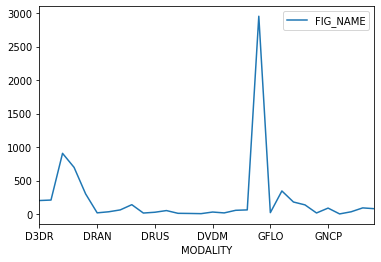

In [4]:
df_clef16.groupby(['MODALITY']).count().plot()

In [5]:
modality2highlevel = {
    'D3DR': 'MOLECULAR',  # not all 3D images are from molecules
    'DMEL': 'MICROSCOPY',
    'DMFL': 'MICROSCOPY',
    'DMLI': 'MICROSCOPY',
    'DMTR': 'MICROSCOPY',
    'DRAN': 'ORGANISMS',
    'DRCO': 'IGNORE',     # Combined modalities in one image
    'DRCT': 'ORGANISMS',
    'DRMR': 'ORGANISMS',
    'DRPE': 'ORGANISMS',
    'DRUS': 'ORGANISMS',
    'DRXR': 'ORGANISMS',
    'DSEC': 'GRAPHICS',   # Printed signals and waves
    'DSEE': 'GRAPHICS',
    'DSEM': 'IGNORE',     # Less than 6 samples
    'DVDM': 'ORGANISMS',
    'DVEN': 'ORGANISMS',
    'DVOR': 'ORGANISMS',
    'GCHE': 'MOLECULAR',
    'GFIG': 'GRAPHICS',
    'GFLO': 'GRAPHICS',
    'GGEL': 'EXPERIMENTAL',
    'GGEN': 'MOLECULAR',
    'GHDR': 'GRAPHICS',
    'GMAT': 'OTHER',
    'GNCP': 'OTHER',
    'GPLI': 'IGNORE',    # There is only one sample
    'GSCR': 'OTHER',
    'GSYS': 'OTHER',
    'GTAB': 'OTHER',
}

In [6]:
modalities = df_clef16['MODALITY'].unique()
modalities.sort()
modalities

array(['D3DR', 'DMEL', 'DMFL', 'DMLI', 'DMTR', 'DRAN', 'DRCO', 'DRCT',
       'DRMR', 'DRPE', 'DRUS', 'DRXR', 'DSEC', 'DSEE', 'DSEM', 'DVDM',
       'DVEN', 'DVOR', 'GCHE', 'GFIG', 'GFLO', 'GGEL', 'GGEN', 'GHDR',
       'GMAT', 'GNCP', 'GPLI', 'GSCR', 'GSYS', 'GTAB'], dtype=object)

less than 6 samples for DSEM


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


less than 6 samples for GPLI


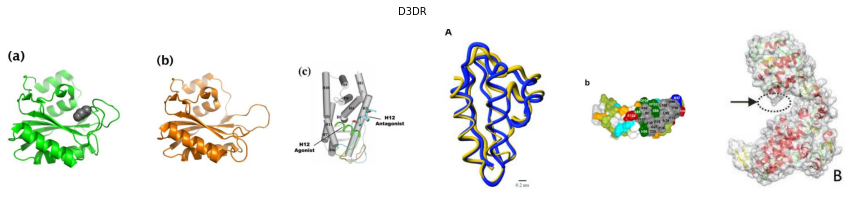

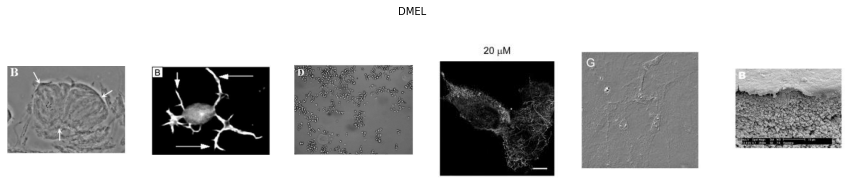

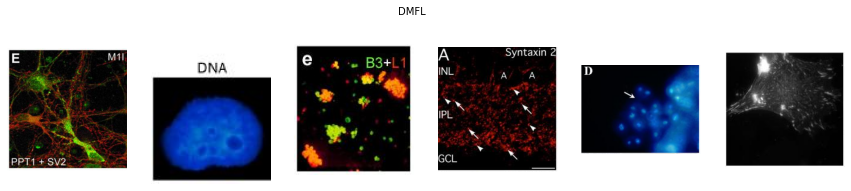

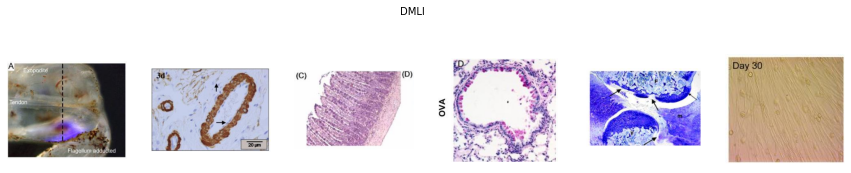

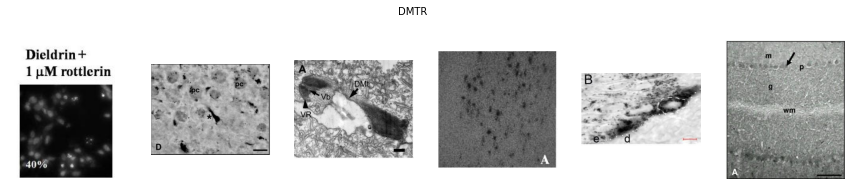

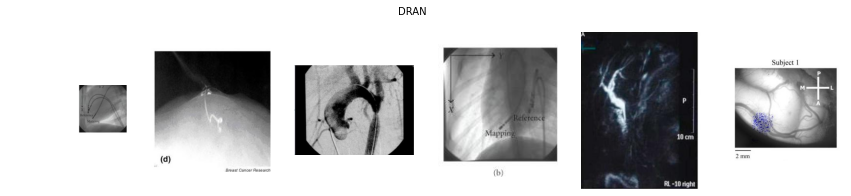

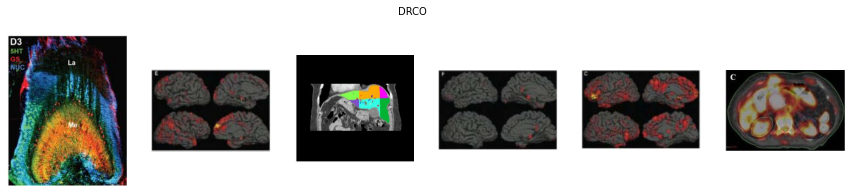

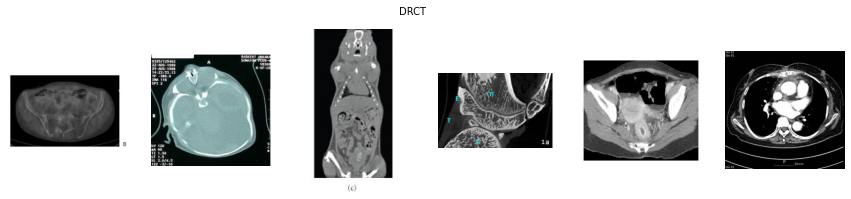

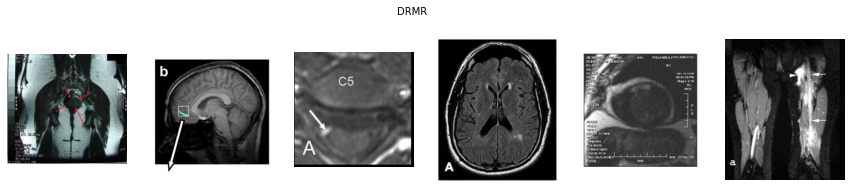

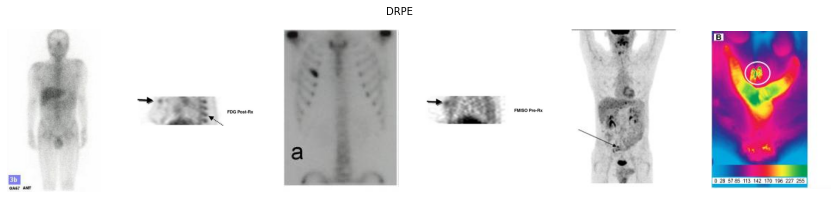

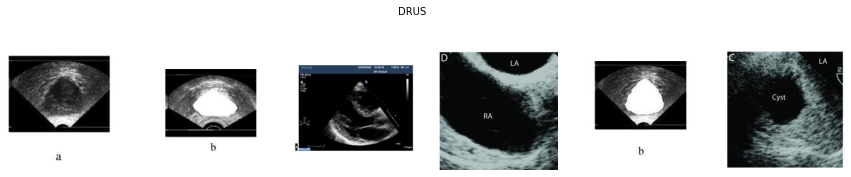

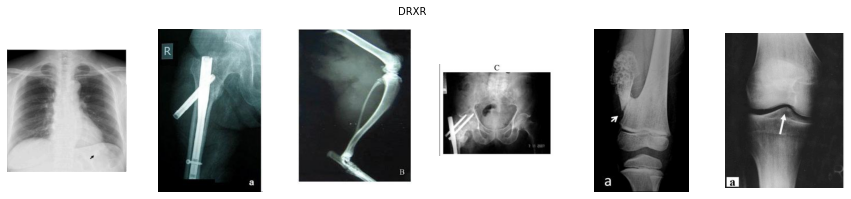

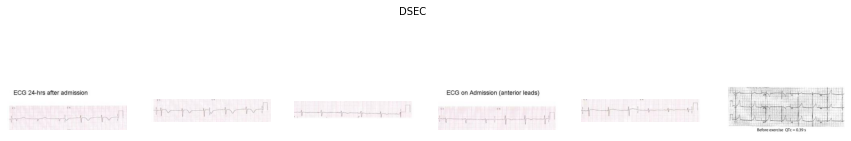

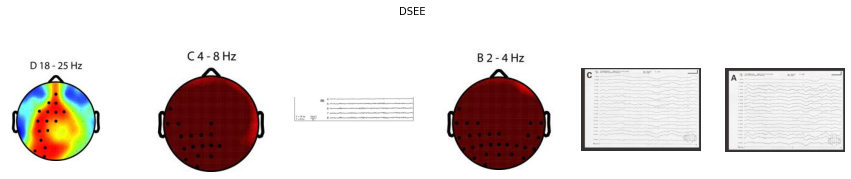

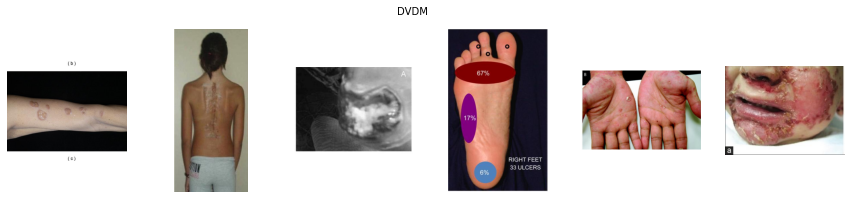

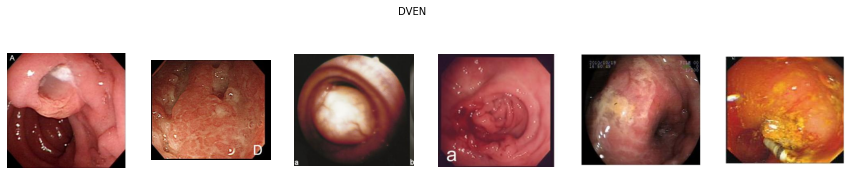

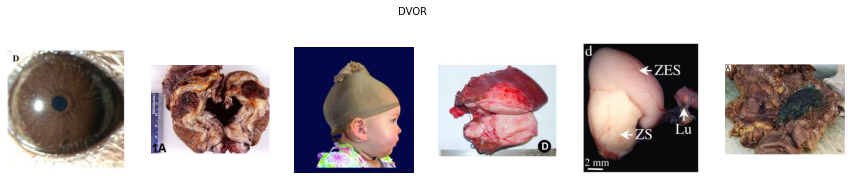

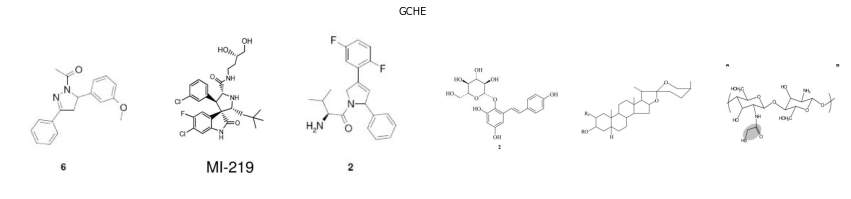

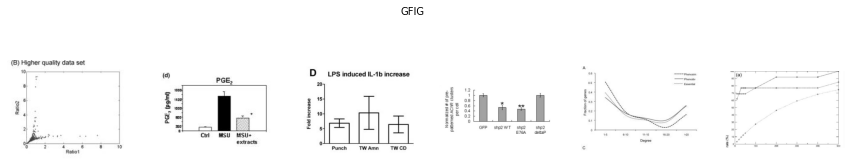

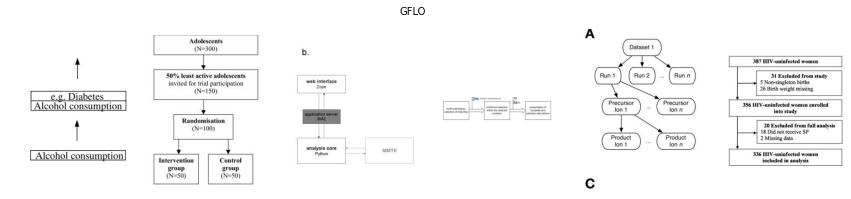

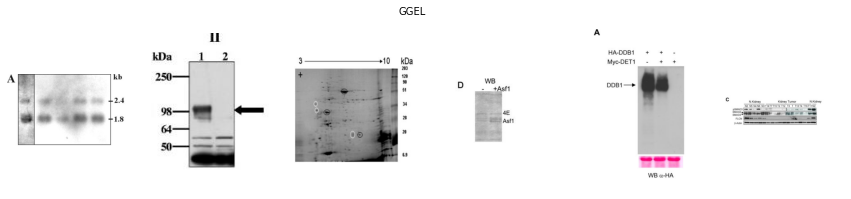

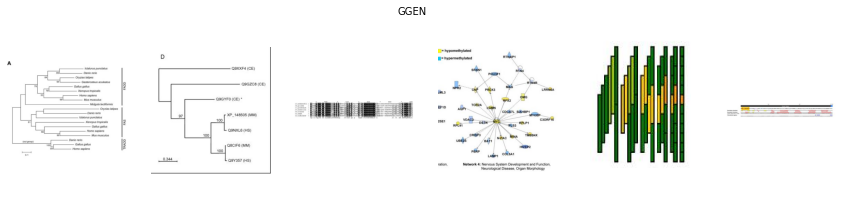

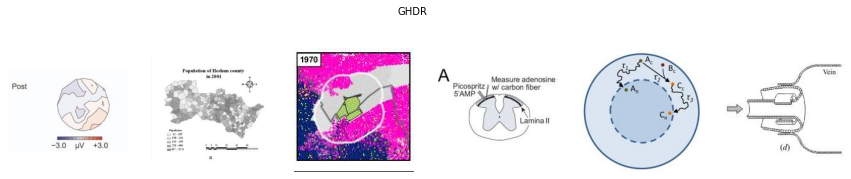

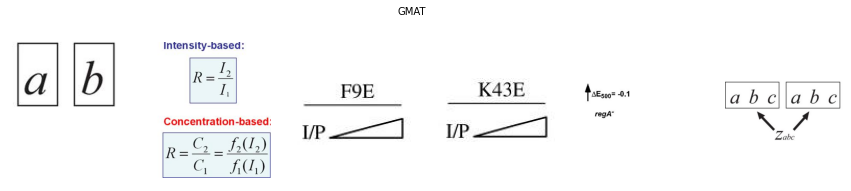

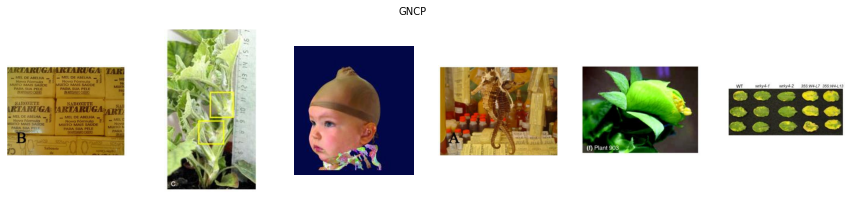

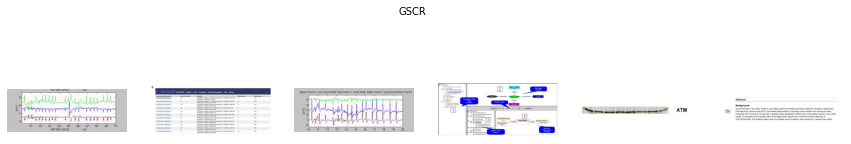

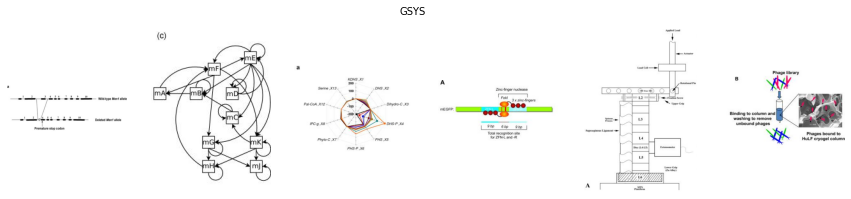

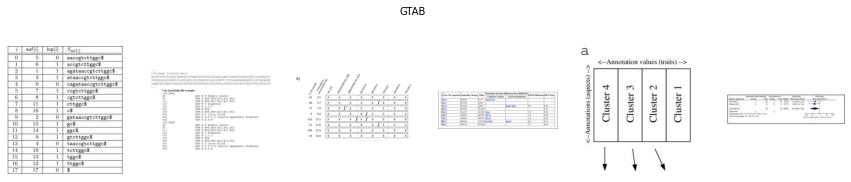

In [7]:
from skimage import io
base_dir = '/mnt/clef/imageclef_2016/train'
# not all 3ds is what we want

for idx, modality in enumerate(modalities):
    images = os.listdir(os.path.join(base_dir, modality))
    if len(images) > 6:
        random.shuffle(images)
        imgs_data = [
            io.imread(os.path.join(base_dir, modality, images[0])),
            io.imread(os.path.join(base_dir, modality, images[1])),
            io.imread(os.path.join(base_dir, modality, images[2])),
            io.imread(os.path.join(base_dir, modality, images[3])),
        ]
        
        f, axarr = plt.subplots(1,6, figsize=(15,3))
        f.suptitle(modality, fontsize=10)
        for i in range(6):
            x = io.imread(os.path.join(base_dir, modality, images[i]))
            axarr[i].imshow(x)
            axarr[i].axis('off')
    else:
        print("less than 6 samples for {modality}".format(modality=modality))

In [8]:
df_clef16['HIGH_MODALITY'] = df_clef16.apply(lambda x: modality2highlevel[x['MODALITY']], axis=1)
df_clef16.tail()

,FIG_NAME,MODALITY,HIGH_MODALITY
6771,jbiol85-11-1,GFIG,GRAPHICS
6772,jbiol85-11-2,DMEL,MICROSCOPY
6773,jbiol85-11-3,DMLI,MICROSCOPY
6774,jbiol85-11-4,DMEL,MICROSCOPY
6775,jbiol85-11-5,DMEL,MICROSCOPY


In [9]:
df_clef16.groupby(['HIGH_MODALITY'])['FIG_NAME'].count()

HIGH_MODALITY
EXPERIMENTAL     344
GRAPHICS        3128
IGNORE            39
MICROSCOPY      2110
MOLECULAR        441
ORGANISMS        408
OTHER            306
Name: FIG_NAME, dtype: int64

In [10]:
df_clef16 = df_clef16[df_clef16['HIGH_MODALITY'] != 'IGNORE']

In [11]:
df_clef16.groupby(['HIGH_MODALITY'])['FIG_NAME'].count()

HIGH_MODALITY
EXPERIMENTAL     344
GRAPHICS        3128
MICROSCOPY      2110
MOLECULAR        441
ORGANISMS        408
OTHER            306
Name: FIG_NAME, dtype: int64

In [12]:
df_clef16['HIGH_MODALITY'].unique()

array(['MICROSCOPY', 'GRAPHICS', 'ORGANISMS', 'MOLECULAR', 'EXPERIMENTAL',
       'OTHER'], dtype=object)

In [16]:
output_path = './clef16_train.csv'
df_clef16.to_csv(output_path, index=True, index_label='ID')

In [17]:
df_clef16.head()

,FIG_NAME,MODALITY,HIGH_MODALITY
0,11373_2007_9226_Fig1_HTML-10,DMFL,MICROSCOPY
1,11373_2007_9226_Fig1_HTML-11,DMFL,MICROSCOPY
2,11373_2007_9226_Fig1_HTML-12,DMFL,MICROSCOPY
3,11373_2007_9226_Fig1_HTML-13,DMFL,MICROSCOPY
4,11373_2007_9226_Fig1_HTML-14,DMFL,MICROSCOPY
